In [6]:
# Importando a biblioteca
import pandas as pd

In [7]:
# Leitura dos arquivos

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [8]:
# Juntando os arquivos

df = pd.concat([df1, df2, df3, df4, df5])

In [9]:
# Exibindo as 5 primeiras linhas

df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [10]:
#Exibindo as cinco últimas linhas

df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [11]:
# Verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
# Alterando o tipo de dado da coluna LojaID

df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [15]:
# Consultando linhas com valores vazios

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True) 

#df["Vendas"].fillna(0, inplace=True) - opção 2: substituir valores vazios por 0
#inplace = True - para modificar em memória, porque senão ele substitui apenas em tempo de execução da célula, mas não substitue o dataset final

In [17]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
132,Natal,2019-01-02,19.61,1036,2
118,Aracaju,2018-01-01,3.34,1522,1
97,Natal,2019-01-02,39.91,1037,3
24,Natal,2018-04-22,868.00,854,3
121,Aracaju,2018-01-01,162.07,1520,3
95,Fortaleza,2019-01-01,35.28,1002,2
28,Aracaju,2018-01-01,114.93,1520,5
9,Aracaju,2019-01-01,149.36,1523,3
26,Natal,2018-07-20,370.00,853,3
24,Fortaleza,2019-01-01,35.38,1005,4


In [19]:
# Apagando as linhas com valores nulos

df.dropna(subset=["Vendas"], inplace=True)

In [20]:
# Removendo linhas que estejam com valores faltantes em todas as colunas

df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [21]:
# Criando a coluna de receita

df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [23]:
df["Receita/Vendas"] = df["Vendas"]/df["Receita"]

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.000000
1,Aracaju,2018-01-01,14.21,1522,6,85.26,0.166667
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.000000
3,Aracaju,2018-01-01,3.01,1521,7,21.07,0.142857
4,Aracaju,2018-01-01,24.51,1522,8,196.08,0.125000


In [25]:
# Retornando a maior receita

df["Receita"].max()

3544.0

In [26]:
# Retornando a menor receita

df["Receita"].min()

3.34

In [27]:
#nlargest

df.nlargest(3, "Receita") #retorna as linhas baseados nas condições (ex: retorna as 3 primeiras linhas onde se tem as maiores receitas)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,0.25
51,Natal,2018-01-21,859.0,852,4,3436.0,0.25
55,Natal,2019-01-08,859.0,854,4,3436.0,0.25


In [28]:
#nsmallest

df.nsmallest(3, "Receita") #retorna as linhas baseados nas condições (ex: retorna as 3 primeiras linhas onde se tem as menores receitas)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [29]:
# Agrupamento por cidade

df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [30]:
# Ordenando o conjunto de dados

df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,0.25
55,Natal,2019-01-08,859.0,854,4,3436.0,0.25
51,Natal,2018-01-21,859.0,852,4,3436.0,0.25
30,Natal,2018-10-02,856.0,853,4,3424.0,0.25
41,Natal,2018-05-20,835.0,852,4,3340.0,0.25
38,Natal,2018-02-25,828.0,852,4,3312.0,0.25
10,Natal,2018-10-27,828.0,852,4,3312.0,0.25
69,Natal,2019-03-24,817.0,852,4,3268.0,0.25
62,Natal,2018-02-10,793.0,854,4,3172.0,0.25
52,Natal,2018-04-27,778.0,854,4,3112.0,0.25


## **Trabalhando com Datas**

In [31]:
# Transformando a coluna de data em tipo inteiro

df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# Verificando o tipo de dado 

df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [35]:
# Transformando coluna de data em data

df["Data"] = pd.to_datetime(df["Data"])

In [36]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [37]:
# Agrupamento por ano

df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [38]:
# Criando uma nova coluna com o ano

df["Ano_Venda"] = df["Data"].dt.year

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
139,Fortaleza,2019-03-02,141.16,980,7,988.12,0.142857,2019
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,0.250000,2019
40,Salvador,2019-02-13,161.87,1036,3,485.61,0.333333,2019
40,Aracaju,2018-01-01,6.99,1522,7,48.93,0.142857,2018
89,Recife,2019-01-01,18.11,980,3,54.33,0.333333,2019


In [41]:
# Extraindo mês e dia 

df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
92,Recife,2019-01-01,163.02,981,4,652.08,0.250000,2019,1,1
79,Recife,2019-01-01,14.53,983,6,87.18,0.166667,2019,1,1
6,Fortaleza,2019-01-01,38.40,1003,4,153.60,0.250000,2019,1,1
66,Salvador,2019-01-01,70.20,1035,3,210.60,0.333333,2019,1,1
111,Recife,2019-03-02,8.00,981,3,24.00,0.333333,2019,3,2


In [43]:
# Retornando a data mais antiga

df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
# Calculando a diferença de dias

df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
2,Natal,2019-03-11,308.00,852,3,924.00,0.333333,2019,3,11,434 days
109,Aracaju,2018-01-01,51.64,1523,5,258.20,0.200000,2018,1,1,0 days
61,Salvador,2019-01-01,4.54,1036,3,13.62,0.333333,2019,1,1,365 days
44,Recife,2019-01-01,142.21,983,8,1137.68,0.125000,2019,1,1,365 days
160,Salvador,2019-01-02,11.76,1034,1,11.76,1.000000,2019,1,2,366 days


In [46]:
# Criando a coluna trimestre

df["Trimestre_Venda"] = df["Data"].dt.quarter

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
41,Salvador,2019-02-13,9.86,1035,2,19.72,0.500000,2019,2,13,408 days,1
6,Recife,2019-01-01,16.27,981,6,97.62,0.166667,2019,1,1,365 days,1
132,Natal,2019-01-02,19.61,1036,2,39.22,0.500000,2019,1,2,366 days,1
53,Fortaleza,2019-01-01,11.48,1002,4,45.92,0.250000,2019,1,1,365 days,1
145,Natal,2019-01-02,84.62,1034,2,169.24,0.500000,2019,1,2,366 days,1


In [48]:
# Filtrando as vendas de 2019 do mês de Março

vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,0.250000,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,0.166667,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,0.166667,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,0.333333,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.000000,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,0.333333,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,0.333333,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.000000,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,0.500000,2019,3,2,425 days,1


## **Visualização de Dados**

In [49]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

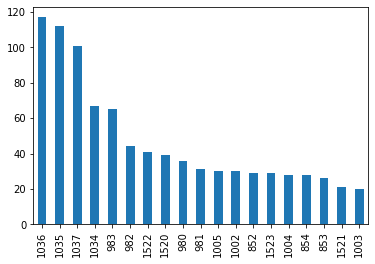

In [50]:
# Gráfico de barras

df["LojaID"].value_counts(ascending=False).plot.bar()

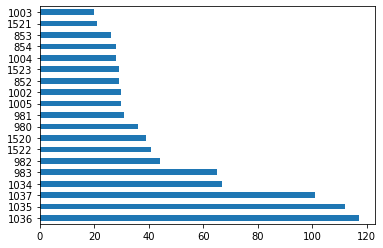

In [51]:
# Gráfico de barras invertidas

df["LojaID"].value_counts(ascending=False).plot.barh()

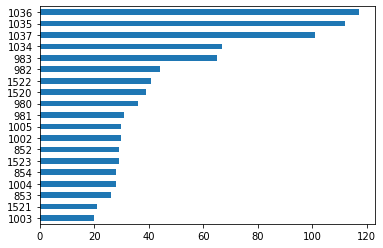

In [53]:
# Gráfico de barras horizontais

df["LojaID"].value_counts(ascending=True).plot.barh()

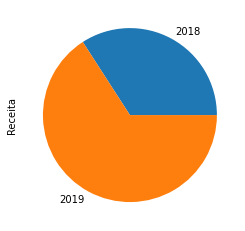

In [54]:
# Gráfico de Pizza

df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [55]:
# Total de Vendas por Cidade

df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

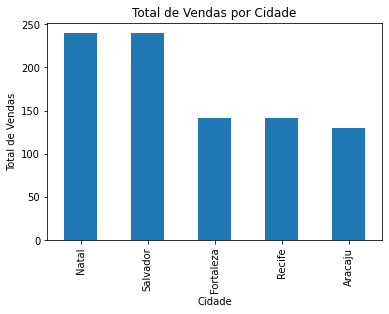

In [56]:
# Adicionando um título e alterando o nome dos eixos

import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Text(0, 0.5, 'Total de Vendas')

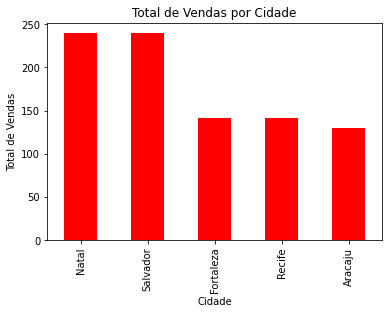

In [57]:
# Alterando a cor

df["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [59]:
# Alterando o estilo

plt.style.use("ggplot")

Text(0, 0.5, 'Total Produtos Vendidos')

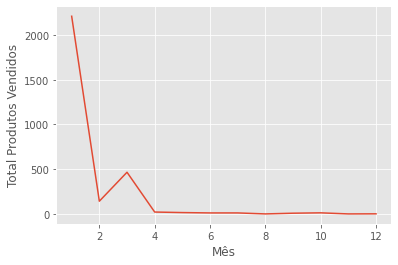

In [62]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")

In [63]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

# Selecionando apenas as vendas de 2019

df_2019 = df[df["Ano_Venda"] == 2019]

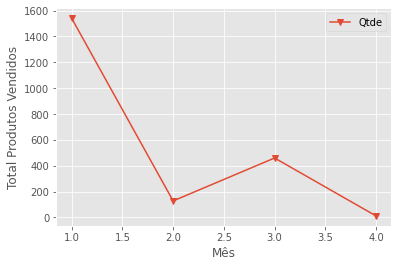

In [64]:
# Total de produtos vendidos por mes

df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

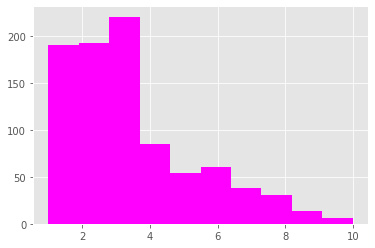

In [65]:
# Histograma

plt.hist(df["Qtde"], color = "magenta")

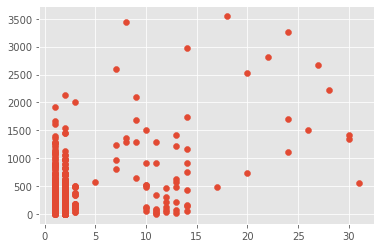

In [66]:
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"])

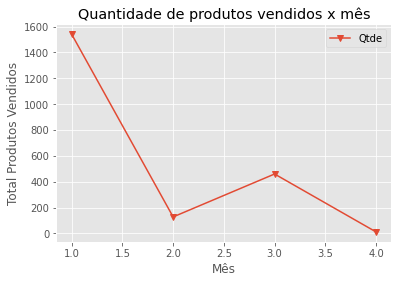

In [67]:
# Salvando em PNG

df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico qtde_mes.png")